## Compress SDF map with autoencoders

In [3]:
import keras
from keras import layers

In [17]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

width = 702
height = 711

# This is our input image
input_img = keras.Input(shape=(2, ), name = 'input_layer')

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='sigmoid', name = 'encoding_layer')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(1, activation='sigmoid', name = 'decoding_layer')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from PIL import Image
from numpy import asarray
import numpy as np

coordinates_file = "./files/coordinates.txt"
distances_file = "./files/distances.txt"
image_file = "./densityMap.png"
image = Image.open(image_file)
data = asarray(image)

from ast import literal_eval
with open(coordinates_file) as f:
    coordinates = [literal_eval(line) for line in f]
X = asarray(coordinates[0])

with open(distances_file) as f:
    distances = [literal_eval(line) for line in f]
y = asarray(distances[0]).reshape(width * height,1)

'''
Using density image
X = []
for i in range(height):
    for j in range(width):
        X.append([j/width, i/height])
X = asarray(X)

y = (data.astype('float32') / 255).reshape(width * height, 1)
'''
print (X.shape)
print (y.shape)

(499122, 2)
(499122, 1)


In [ ]:
autoencoder.fit(x = X, y = y,
                epochs=50)

Epoch 1/50
15598/15598 [==============================] - 7s 443us/step - loss: -7269.7271
Epoch 2/50
15598/15598 [==============================] - 7s 439us/step - loss: -21266.7734
Epoch 3/50
15598/15598 [==============================] - 7s 422us/step - loss: -35238.7383
Epoch 4/50
15598/15598 [==============================] - 7s 430us/step - loss: -49179.7070
Epoch 5/50
15598/15598 [==============================] - 7s 479us/step - loss: -63139.8203
Epoch 6/50
15598/15598 [==============================] - 7s 459us/step - loss: -77083.3359
Epoch 7/50
15598/15598 [==============================] - 7s 457us/step - loss: -91020.0078
Epoch 8/50
15598/15598 [==============================] - 7s 449us/step - loss: -104978.6719
Epoch 9/50
15598/15598 [==============================] - 7s 448us/step - loss: -118936.1250
Epoch 10/50
15598/15598 [==============================] - 7s 448us/step - loss: -132885.5156
Epoch 11/50
15598/15598 [==============================] - 7s 456us/step - lo

In [176]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(encoded_imgs)

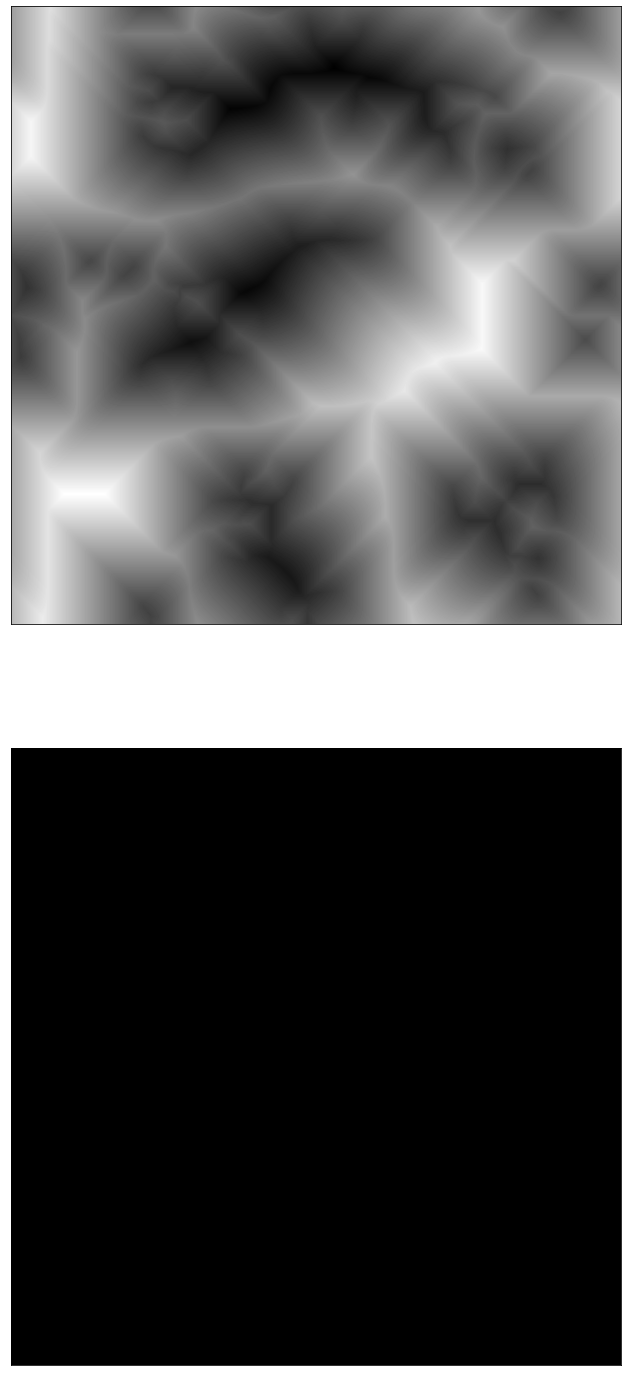

In [177]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # How many images we are going to display
plt.figure(figsize=(25, 25))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(y.reshape(height, width))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs.reshape(height, width))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()